## 利用するPythonモジュールのインポート

In [ ]:
import numpy as np  # データサイエンスの定番モジュール
import scipy as sp  # 科学技術計算で頻用するツールを集めたモジュール
import matplotlib.pyplot as plt  # 可視化ツール
from scipy.integrate import odeint  # 常微分方程式を数値積分する関数
from scipy.stats import linregress # 回帰分析をする関数

## グラフ描画の関数

In [ ]:
def plot2d(t, y_list, t_label, y_label, legend_list):
    plt.figure(figsize=(12,8)) # 描画サイズ
    plt.xlabel(t_label)  # x軸のラベル
    plt.ylabel(y_label)  # y軸のラベル
    plt.grid()  # 点線の目盛りを表示

    for i in range(y_list.shape[1]):
        plt.plot(t, y_list[:, i], label=legend_list[i])

    plt.legend(loc = "upper right")
    plt.show()

# 質量作用則（Law of Mass Action）
$$\require{mhchem}$$


## 一方向の反応

* 以下のような反応 $R_1$ を考える。

$$\ce{A + B ->[k] 2C}$$

> * **基質**：$\ce{A}$，$\ce{B}$
> * **生成物**：$\ce{C}$
> * **反応速度** $V_R$ は、基質の濃度に比例する。
> * **速度定数** $k$ ：反応の進みやすさを表す。

* このとき、反応速度は以下のように書ける

$$V_{R_1} = k[\ce{A}][\ce{B}]$$ 

* $V_{R_1}$ の次元（単位）が濃度変化速度（たとえば $\ce{M/min}$）を表しているとき
  * 物質濃度 $\ce{A}$，$\ce{B}$ の次元が $\ce{M}$ であれば、
  * 速度定数 $k$ の次元は $\ce{M^{-1}min^{-1}}$

* この時、反応に参加している物質 $\ce{A}$，$\ce{B}$，$\ce{C}$ の濃度変化速度は以下のように書ける。
$$
\begin{eqnarray}
  \dot{\ce{A}} &=& \frac{d\ce{A}}{dt} = -V_{R_1} = -k[\ce{A}][\ce{B}]\\
  \dot{\ce{B}} &=& \frac{d\ce{B}}{dt} = -V_{R_1} = -k[\ce{A}][\ce{B}]\\
  \dot{\ce{C}} &=& \frac{d\ce{C}}{dt} = 2 V_{R_1} = 2k[\ce{A}][\ce{B}]
\end{eqnarray}
$$ 

* この反応が試験管の中で進行するとき、具体的な $\ce{A}$，$\ce{B}$，$\ce{C}$ の濃度変化を計算するには、反応開始時点の $\ce{A}$，$\ce{B}$，$\ce{C}$ の濃度（**初期条件**）を知る必要がある。


## 質量作用則の数値計算 - $R_1$

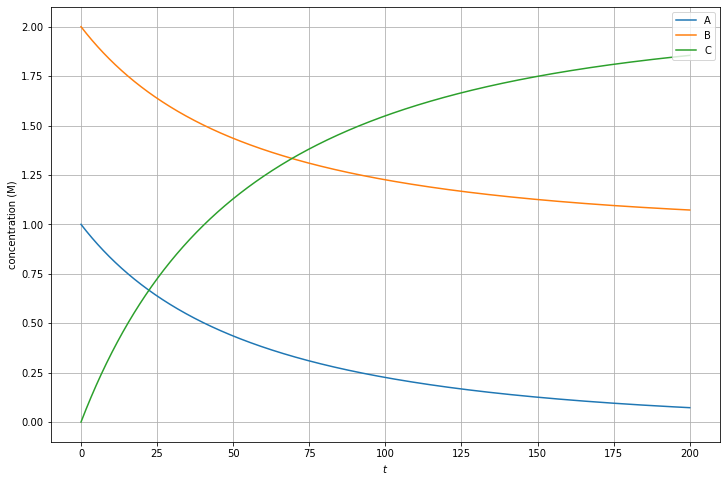

In [ ]:
def velocity_R1(s, t, k):
    """
    引数 s ：基質濃度の配列 [ Aの濃度, Bの濃度, Cの濃度 ]

    """
    A = s[0]
    B = s[1]
    C = s[2]

    V_R1 = k * A * B

    dAdt = - V_R1
    dBdt = - V_R1
    dCdt = 2 * V_R1

    return [dAdt, dBdt, dCdt]

"""
数値計算の時間の設定
  第１引数：開始時刻
  第２引数：終了時刻
  第３引数：ステップ数
"""
t_condition = np.linspace(0.0, 200.0, 10000)  # 時刻0から200を、10000ステップで数値計算（１ステップ＝0.02）
k = 0.01  # 速度定数
sp_0 = [1.0, 2.0, 0.0]  # 物質 A, B, C の初期濃度
legend_list = ["A", "B", "C"]  # グラフ中の凡例に用いる文字列

sp_timecourse = odeint(velocity_R1, sp_0, t_condition, args=(k,))  # 数値計算を実行し、結果を変数　sp_timecourse に格納する

#グラフを描く
plot2d(t_condition, sp_timecourse, "$t$", "concentration (M)", legend_list)

## 両方向の反応

* 反応 $R_1$ に逆方向の反応を加えた両方向の反応 $R_2$ を考える。

$$\ce{A + B <=>[k_f][k_r] 2C}$$

* 反応速度 $V_{R_2}$ は、順反応（forward, 右向き）と逆反応（reverse, 左向き）を合成した（足し合わせた）ものであり、順反応と逆反応は独立したmass actionだと考える。

* このとき、順反応、逆反応の反応速度 $V_{{R_2}f}$, $V_{{R_2}r}$ は以下のように書ける

$$
\begin{eqnarray}
  V_{{R_2}f} &=& k_f[\ce{A}][\ce{B}]\\
  V_{{R_2}r} &=& k_r[\ce{C}]^2
\end{eqnarray}
$$


* この時、反応に参加している物質 $\ce{A}$，$\ce{B}$，$\ce{C}$ の濃度変化速度は以下のように書ける。
$$
\begin{eqnarray}
  \dot{\ce{A}} &=& V_{{R_2}r} - V_{{R_2}f} = k_r[\ce{C}]^2 - k_f[\ce{A}][\ce{B}]\\
  \dot{\ce{B}} &=& V_{{R_2}r} - V_{{R_2}f} = k_r[\ce{C}]^2 - k_f[\ce{A}][\ce{B}]\\
  \dot{\ce{C}} &=& 2 V_{{R_2}f} - 2V_{{R_2}r} = 2k_f[\ce{A}][\ce{B}] - 2k_r[\ce{C}]^2
\end{eqnarray}
$$ 





## 質量作用則の数値計算 - $R_2$

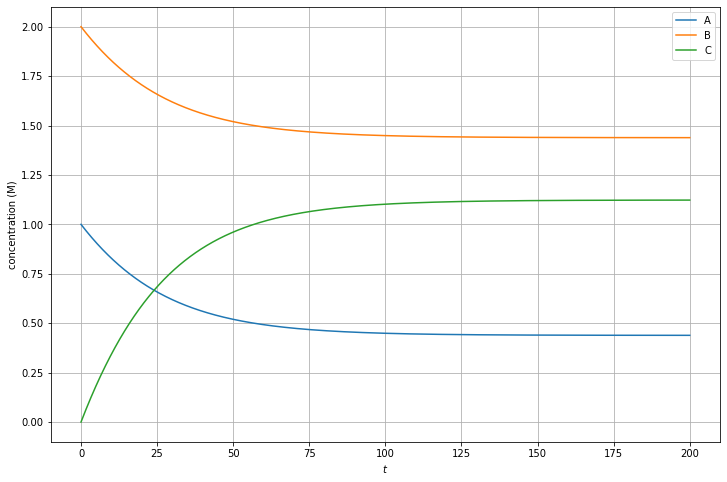

In [ ]:
def velocity_R2(s, t, kf, kr):
    """
    引数 s ：基質濃度の配列 [ Aの濃度, Bの濃度, Cの濃度 ]
    """
    A = s[0]
    B = s[1]
    C = s[2]

    V_R2_f = kf * A * B
    V_R2_r = kr * C * C

    dAdt = V_R2_r - V_R2_f
    dBdt = V_R2_r - V_R2_f
    dCdt = 2 * V_R2_f - 2 * V_R2_r

    return [dAdt, dBdt, dCdt]

"""
数値計算の時間の設定
  第１引数：開始時刻
  第２引数：終了時刻
  第３引数：ステップ数
"""
t_condition = np.linspace(0.0, 200.0, 10000)  # 時刻0から200を、10000ステップで数値計算（１ステップ＝0.02）
kf = 0.01  # 順反応の速度定数
kr = 0.005  # 逆反応の速度定数
sp_0 = [1.0, 2.0, 0.0]  # 物質 A, B, C の初期濃度
legend_list = ["A", "B", "C"]  # グラフ中の凡例に用いる文字列

sp_timecourse = odeint(velocity_R2, sp_0, t_condition, args=(kf, kr))  # 数値計算を実行し、結果を変数　sp_timecourse に格納する

#グラフを描く
plot2d(t_condition, sp_timecourse, "$t$", "concentration (M)", legend_list)

## 定常状態

* 順反応と逆反応が釣り合うと、**見かけ上**、物質量の時間変化がなくなる。
  * 複数の反応が釣り合って見かけ上の時間変化がなくなった状態を**平衡**と呼ぶ。
  * 物質量に時間変化はないが、反応は起こりつづけている。
    * 反応は起こりつづけているが、反応速度に変化はなく一定。
* 系の時間変化がなくなった状態を**定常状態 steady state** という。


---

# 酵素反応速度論

* 酵素反応における酵素の反応速度と基質濃度の関係を表現するモデルに**ミカエリス・メンテン式** **Michaelis–Menten equation**　がある。
* このモデルでは、**酵素 Enzyme** と**基質 Substance** が結合した**酵素-基質複合体 Enzyme-Substance Complex** を形成することにより酵素反応が進行するという概念に基づき、**生成物 Product** を生成する一連の反応機構を以下のように仮定する

$$\ce{E + S <=>[k_{1}][k_{-1}] ES ->[k_{2}] E + P} \tag{1}$$

> * **酵素**：$\ce{E}$
> * **基質**：$\ce{S}$
> * **酵素-基質複合体**：$\ce{ES}$
> * **生成物**：$\ce{P}$
> * **速度定数** $k_{1}$, $k_{-1}$, $k_{2}$ ：反応の進みやすさを表す。

* この酵素反応に関わる $\ce{E}$、$\ce{S}$、$\ce{ES}$、$\ce{P}$ の濃度変化速度は以下のように書ける。

$$
\begin{eqnarray}
    \frac{d\ce{E}}{dt} &=& -k_{1}[\ce{E}][\ce{S}] + (k_{-1}+k_{2})[\ce{ES}] \tag{2}\\
    \frac{d\ce{S}}{dt} &=& -k_{1}[\ce{E}][\ce{S}] + k_{-1}[\ce{ES}] \tag{3}\\
    \frac{d\ce{ES}}{dt} &=& k_{1}[\ce{E}][\ce{S}] - (k_{-1}+k_{2})[\ce{ES}] \tag{4}\\
    \frac{d\ce{P}}{dt} &=& k_{2}[\ce{ES}] \tag{5}
\end{eqnarray}
$$ 

* $(1)$ で表される酵素反応では、反応の初速度 $v_{0}$と基質 $\ce{S}$ のモル濃度の間には、一般に以下の式が成り立つ。

$$v_{0} = \frac{V_{\ce{max}}[\ce{S}]}{K_\ce{m}+[\ce{S}]} \tag{6}$$ 

> * **最大反応速度**：$V_{\ce{max}}$
> * **ミカエリス定数**：$K_{\ce{m}}$（$V_{\ce{max}}$の 1/2 の速度を与える基質濃度に相当）
>    * $K_{\ce{m}}$ は酵素基質複合体における酵素と基質の親和性の尺度である。

* $(6)$ を**ミカエリス・メンテン式** **Michaelis–Menten equation** と呼ぶ。

### ミカエリス・メンテン式の導出

* **（仮定）**： $[\ce{S}]$ が高濃度の場合、酵素反応の第一段階は $k_{1} \gg k_{2}$ となり、$[\ce{ES}]$ は定常状態に達する。
* この反応系の律速段階は、$\ce{ES ->[k_{2}] E + P}$ となる。
* そのため、[$\ce{P}$] を生成する反応速度 $v$ は、以下の式で表せる。

$$v = k_{2}[\ce{ES}] \tag{7}$$

* **（仮定）**： $(1)$ が示す酵素反応において、$[\ce{ES}]$ が時間変化しない定常状態に短時間で達するものとする。
* $[\ce{ES}]$が定常状態の時、$(4)$は以下の式で表すことができる。

$$\frac{d\ce{ES}}{dt} =  k_1[\ce{E}][\ce{S}] - (k_{-1} + k_{2})[\ce{ES}]=0 \tag{8}$$


* この反応系の酵素の総濃度を $[\ce{E}]_0$ とすると、以下の式で表せる。

$$[\ce{E}]_0 = [\ce{E}] + [\ce{ES}] \tag{9}$$

* $(8)$、$(9)$を変形して $[\ce{E}]$ を削除し、$[\ce{ES}]$ について解く。

$$[\ce{ES}] = \frac{[\ce{E}]_0 [\ce{S}]}{\frac{k_{-1}+k_{2}}{k_{1}}+[\ce{S}]} \tag{10}$$

* $(10)$ を $(7)$に代入すると、

$$v = k_{2}\frac{[\ce{E}]_0 [\ce{S}]}{\frac{k_{-1}+k_{2}}{k_{1}}+[\ce{S}]} \tag{11}$$

* ここで速度パラメータを以下を定義すれば、$(11)$ は $(6)$ となる。

> * $V_{\ce{max}} = k_{2}[\ce{E}]_0$
> * $K_{\ce{m}} = \frac{k_{-1}+k_{2}}{k_{1}}$

## ミカエリス・メンテンによる酵素反応の数値計算

In [ ]:
def velocity_MM1(s, t, k1, k_1, k2):

    """
    引数 s  ：基質濃度の配列 [ Eの濃度, Sの濃度, ESの濃度, Pの濃度 ]
    引数 t  ：時刻
    引数 k1 ： E + S -> ES の速度定数
    引数 k_1 ： ES -> E + S の速度定数
    引数 k2 ： ES -> E + P の速度定数
    """

    # 各物質濃度の情報    
    E  = s[0]
    S  = s[1]
    ES = s[2]
    P  = s[3]

    # 反応速度式
    V_R1_f = k1 * E * S
    V_R1_r = k_1 * ES
    V_R2 = k2 * ES

    # 物質収支式
    dEdt  = - V_R1_f + V_R1_r + V_R2
    dSdt  = - V_R1_f + V_R1_r
    dESdt = V_R1_f - V_R1_r - V_R2
    dPdt  = V_R2

    return [dEdt, dSdt, dESdt, dPdt]


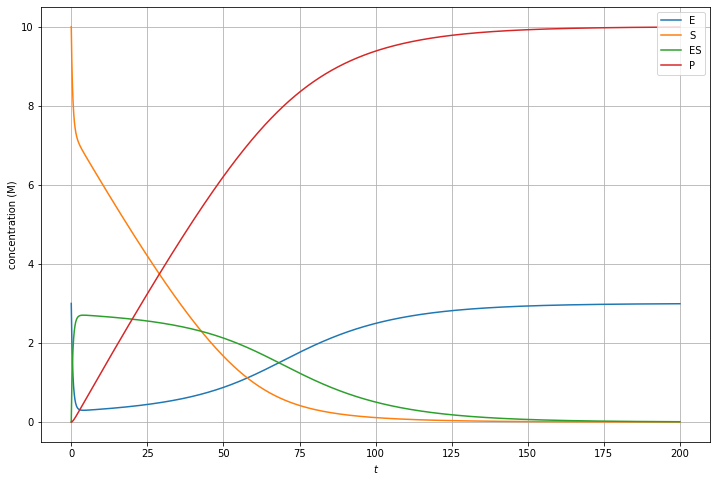

In [ ]:
t_condition = np.linspace(0.0, 200.0, 10000)  # 時刻0から200を、10000ステップで数値計算

k1 = 0.2  # E + S -> ES の速度定数
k_1 = 0.1  # ES -> E + S の速度定数
k2 = 0.05  # ES -> E + P の速度定数

'''
E：酵素（Enzyme）
S：基質（Substrate）
ES：酵素-基質複合体（Enzyme‐Substrate complex）
P：生成物（Product）
'''
sp_0 = [3.0, 10.0, 0.0, 0.0]  # 物質 E, S, ES, P の初期濃度
legend_list = ["E", "S", "ES", "P"]

sp_timecourse = odeint(velocity_MM1, sp_0, t_condition, args=(k1, k_1, k2))  # 数値計算を実行し、結果を変数　sp_timecourse に格納する
MM1_data = sp_timecourse

#グラフを描く
plot2d(t_condition, sp_timecourse, "$t$", "concentration (M)", legend_list)

## ミカエリス・メンテンプロット（S-Vプロット）

* ミカエリス・メンテン式は、基質濃度と酵素反応速度（酵素活性）の関係を定量的に表現した式である。
* 横軸に基質濃度、縦軸に酵素反応速度をとってプロットした場合、ミカエリス・メンテンプロット （S-vプロット）呼ばれる直角双曲線を描くことができる。

In [ ]:
def michaelis_menten(S, Vmax, Km): # ミカエリス・メンテン式の関数
    '''
    入力：S（基質濃度）、Vmax（最大反応
    速度）、Km（ミカエリス定数）
    出力：反応速度
    '''
    return Vmax * S /(Km + S)

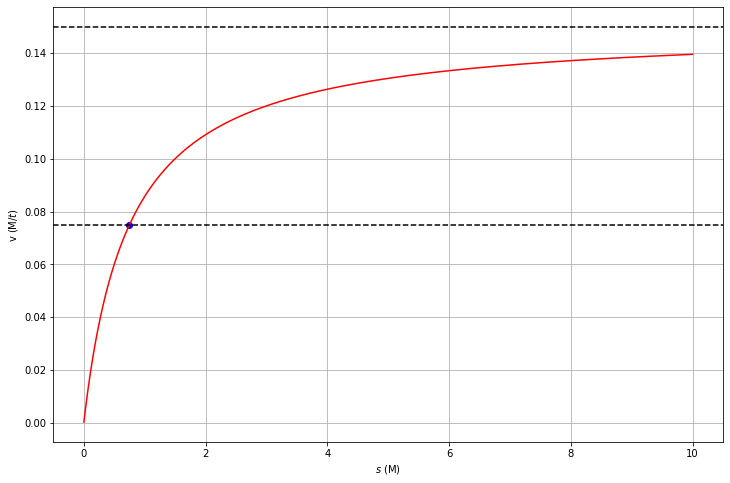

In [ ]:
Vmax = k2 * sp_0[0] # 最大反応速度 Vmax
Vmax_half = Vmax/2.0 # Vmaxの1/2の反応速度
Km = (k_1 + k2)/k1# ミカエリス定数

x_substrate = sp_timecourse[:, 1] # x軸データ（基質の濃度）の配列
y_velocity = [michaelis_menten(s, Vmax, Km) for s in x_substrate] # y軸データ（基質の濃度に対応する反応速度）を格納する配列

# 描画
plt.figure(figsize=(12,8)) # 描画サイズ

plt.plot(x_substrate, y_velocity, c='red') # x軸を基質濃度、y軸を反応速度でプロット
plt.scatter(Km, Vmax_half, c='blue') # Km の座標 (Km, Vmax/2) に点を打つ

plt.xlabel('$s$ (M)')
plt.ylabel('v (M/$t$)')

plt.grid()
plt.axhline(Vmax, c='black',ls='--') # y = Vmax に点線を引く
plt.axhline(Vmax_half, c='black',ls='--') # y = Vmax_half (Vmax/2) に点線を引く


## ラインウィーバー・バーグの式・プロット（速度パラメータの求め方）

* 実験による酵素反応の計測結果から、ラインウィーバー・バークプロットを作成すると、$K_{\ce{m}}$
値と $V_{\ce{max}}$ を求めることができる。
* ラインウィーバー・バークの式は、$(11)$ の両辺の逆数をとる。

$$\frac{1}{v} = \frac{K_{\ce{m}}}{V_{\ce{max}}}\frac{1}{[\ce{S}]}+\frac{1}{V_{\ce{max}}}\tag{12}$$

* プロットは 1/$[\ce{S}] に対する $1/$v$ の直線となる。
* 直線のy切片が 1/$V_{\ce{max}}$、x切片が 1/$K_{\ce{m}}$となる。

### 実測値データを用いた描画 

Vmax : 0.05768527005902446
1/Vmax : 17.335448009115403
Km : 0.09119833692393489
-1/Km : -10.96511223482137



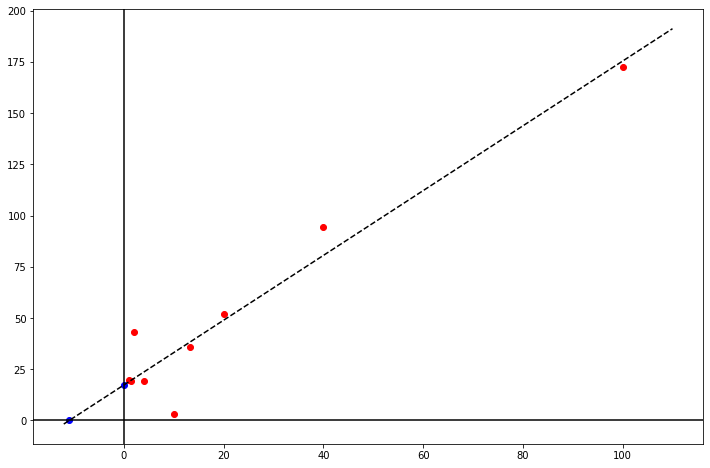

In [ ]:
def lineweaver_burk_plot(s, v, step=1000):

    # データを逆数に変換する（逆数データ）
    recip_s = np.reciprocal(s)
    recip_v = np.reciprocal(v)

    # 逆数データを用いた線形回帰
    '''
    slope：傾き
    y_intercept：y切片
    r_varue：相関係数
    p_value：p値
    '''
    slope, y_intercept, r_value, p_value, std_err = linregress(recip_s, recip_v) # 最小２乗法による単回帰
    x_intercept = ((0 - y_intercept)/slope) # x切片

    # 線形回帰の準備
    x = np.linspace(x_intercept*1.1, max(recip_s)*1.1, step)
    for i in x:
        y = (slope * x) + y_intercept

    # 描画サイズ
    plt.figure(figsize=(12,8))
    
    # x軸とy軸を描画
    plt.axhline(0, c='black')
    plt.axvline(0, c='black')

    # 逆数データの座標を描画
    plt.scatter(recip_s, recip_v, c='red')

    # 1/Vmax を描画
    plt.scatter(0.0, y_intercept, c='blue')

    # -1/Km を描画
    plt.scatter(x_intercept, 0, c='blue')

    # 線形回帰
    plt.plot(x, y, c='black', ls='--')

    # Vmax と Km の算出&出力
    Vmax = np.reciprocal(y_intercept)
    Km = np.reciprocal(-1*x_intercept)

    print(f'Vmax : {Vmax}')
    print(f'1/Vmax : {y_intercept}')
    print(f'Km : {Km}')
    print(f'-1/Km : {x_intercept}')
    print('')

# 実測値のサンプル
exprerimental_s = np.array([0.01, 0.025, 0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1.0]) # mM
exprerimental_v = np.array([0.0058, 0.0106, 0.0193, 0.028, 0.299, 0.0521, 0.0232, 0.0521, 0.0502])

lineweaver_burk_plot(exprerimental_s, exprerimental_v)

## 参考資料
* **NumPy** - https://numpy.org/

* **SciPy** - https://docs.scipy.org/doc/scipy
    * **scipy.integrate** https://docs.scipy.org/doc/scipy/reference/integrate
    * **scipy.stats** https://docs.scipy.org/doc/scipy/reference/stats.html?highlight=stats#module-scipy.stats

* **matplotlib** - https://matplotlib.org/
  * Python でグラフを描くための定番パッケージ

* **Easy Copy Mathjax** - https://easy-copy-mathjax.nakaken88.com
  * Jupyterノートブックに数式を書き込むのに使えるMathjaxのチートシート

* **mhchem** - http://mirrors.ctan.org/macros/latex/contrib/mhchem/mhchem.pdf
  * Mathjaxに実装されている化学式、化学反応式を書くための $\TeX$ パッケージ。
  * [TeXによる化学組版](https://doratex.hatenablog.jp/entry/20131203/1386068127) mhchem の解説記事（TeX Alchemist Online）

* **ヘインズ・ウルフプロット Hanes–Woolf plot**
    * https://ja.wikipedia.org/wiki/%E3%83%98%E3%82%A4%E3%83%B3%E3%82%BA%EF%BC%9D%E3%82%A6%E3%83%AB%E3%83%95%E3%83%97%E3%83%AD%E3%83%83%E3%83%88

* **イーディー・ホフステープロット Eadie–Hofstee plot**
    * https://ja.wikipedia.org/wiki/%E3%82%A4%E3%83%BC%E3%83%87%E3%82%A3%E3%83%BC%EF%BC%9D%E3%83%9B%E3%83%95%E3%82%B9%E3%83%86%E3%83%BC%E5%9B%B3